In [14]:
import numpy
import pandas
import joblib
import matplotlib.pyplot
import sklearn.tree

# Instructions

- Read **the train data** from the CSV file and properly set the index
- Use `joblib` to load the trained model and print out the model parameters

In [15]:
data_train = pandas.read_csv('./data/features.train.csv').set_index('id')
data_train

,feature_1,feature_2,label
id,,,
253,2.2189,0.3114,1
667,-0.2929,0.3086,1
85,0.6741,-0.4251,1
969,0.9695,-0.5618,1
75,-1.5488,0.6378,0
...,...,...,...
835,0.6986,-0.2398,1
192,-0.4636,0.5754,0
629,0.6531,0.2976,0


In [16]:
model = joblib.load('model/model.joblib')
model

DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=0)

# Instructions
- Scikit-learn decision tree models have all the model parameters packed under `.tree`
  - Ref: https://scikit-learn.org/stable/auto_examples/tree/plot_unveil_tree_structure.htm

- Print out the model parameters by putting them in a `pandas.DataFrame`
  - Hint: use the following attributes
```
.tree_.node_count
.tree_.value
.tree_.feature
.tree_.threshold
.tree_.children_left
.tree_.children_right
```
- Now, create a `pandas.DataFrame` with one `sample` having a `feature_1 = 0` and a `feature_2 = 0`
- Use the model parameters to make prediction for the `sample`
- Use the model parameters to calculate the probability $\mathrm{P}(y=1| \mathbf{x})$ for the `sample`
- Verify your prediction using `.predict`
- Verify your probability using `.predict_proba`


In [17]:
model_params = pandas.DataFrame({
    'node': range(model.tree_.node_count),
    'proba': model.tree_.value[:, 0, 1] / model.tree_.value[:, 0, :].sum(axis=1),
    'feature': model.tree_.feature,
    'threshold': model.tree_.threshold,
    'if_feature_is_less': model.tree_.children_left,
    'if_feature_is_more': model.tree_.children_right,
}).set_index('node')
model_params

,proba,feature,threshold,if_feature_is_less,if_feature_is_more
node,,,,,
0,0.489333,1,0.39755,1,20
1,0.772093,0,-0.41270,2,7
2,0.022727,0,-0.74460,3,4
3,0.000000,-2,-2.00000,-1,-1
4,0.125000,0,-0.69830,5,6
5,1.000000,-2,-2.00000,-1,-1
6,0.000000,-2,-2.00000,-1,-1
7,0.857513,1,-0.12185,8,13
8,0.953704,0,1.28740,9,12


In [18]:
sample = pandas.DataFrame({
    'feature_1': [0.], 
    'feature_2': [0.],
})
sample

,feature_1,feature_2
0,0.0,0.0


In [19]:
model_params.loc[15]

proba                 0.907692
feature              -2.000000
threshold            -2.000000
if_feature_is_less   -1.000000
if_feature_is_more   -1.000000
Name: 15, dtype: float64

In [20]:
model.predict(sample)

array([1])

In [21]:
model.predict_proba(sample)

array([[0.09230769, 0.90769231]])

# Instructions
- Visualize the decision tree using `sklearn.tree.plot_tree()` with a following paramters:
```
    feature_names=['feature_1', 'feature_2'] 
    class_names=True 
    proportion=True
    node_ids=True
```
- Export the decision tree to `./results/decision_tree.png`
  - Hint: using `matplotlib.pyplot.savefig`


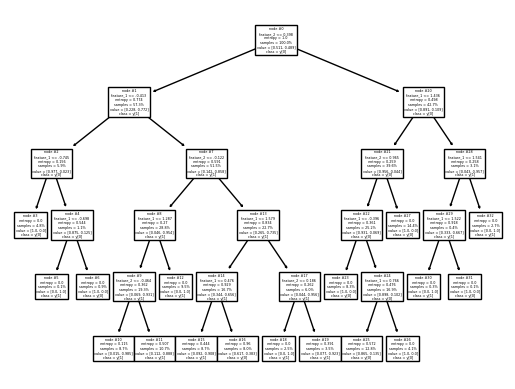

In [22]:
axes = sklearn.tree.plot_tree(
    model, 
    feature_names=['feature_1', 'feature_2'], 
    class_names=True, 
    proportion=True,
    node_ids=True
)
matplotlib.pyplot.savefig("./results/decision_boundary.png", dpi=100)

# Instructions
- Use `.predict_proba` to calculate prediction probabilities for all training samples
- Properly put the prediction probabilities $\mathrm{P}(y=1| \mathbf{x})$ into `pandas.DataFrame`, with a column named `probability`
- The prediction probabilities $\mathrm{P}(y=0| \mathbf{x})$ can be ignored

In [23]:
probabilities_from_sklearn = model.predict_proba(data_train[['feature_1', 'feature_2']])
probabilities_from_sklearn

array([[0.07692308, 0.92307692],
       [0.09230769, 0.90769231],
       [0.1125    , 0.8875    ],
       ...,
       [0.61666667, 0.38333333],
       [1.        , 0.        ],
       [0.01538462, 0.98461538]])

In [24]:
probabilities_from_sklearn = pandas.DataFrame(
    data = probabilities_from_sklearn[:, 1],
    index = data_train.index,
    columns = ['probability']
)
probabilities_from_sklearn

,probability
id,
253,0.923077
667,0.907692
85,0.887500
969,0.984615
75,0.000000
...,...
835,0.887500
192,0.000000
629,0.383333


# Instructions
- Use `.predict` to produce predictions for all training samples
- Properly put the predictions into `pandas.DataFrame`, with a column named `prediction`

In [25]:
predictions_from_sklearn = model.predict(data_train[['feature_1', 'feature_2']])
predictions_from_sklearn

array([1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1,

In [26]:
predictions_from_sklearn = pandas.DataFrame(
    data    = predictions_from_sklearn,
    index   = data_train.index,
    columns = ['prediction']
)
predictions_from_sklearn

,prediction
id,
253,1
667,1
85,1
969,1
75,0
...,...
835,1
192,0
629,0
